In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let us generate some nonlinear data, based on a simple quadratic equation $x^2+x+2$ (plus some Gaussian noise)

Text(0, 0.5, 'response y')

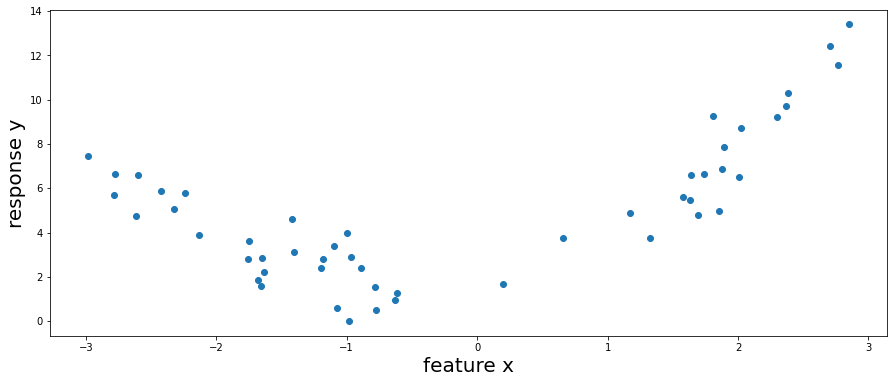

In [25]:
m = 50
X = 6*np.random.rand(m,1)-3
y = X**2+X+2+np.random.randn(m,1)
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)

Let us split the dataset, so that 3/4 of it is used to train the model, after which we measure the model's performance on the remaining 1/4.

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

## Linear Regression

Clearly, a straight line $y = \theta_0 + \theta_1x$ will never fit this data properly:

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

RMSE on training set: 7.1
RMSE on testing set: 4.92


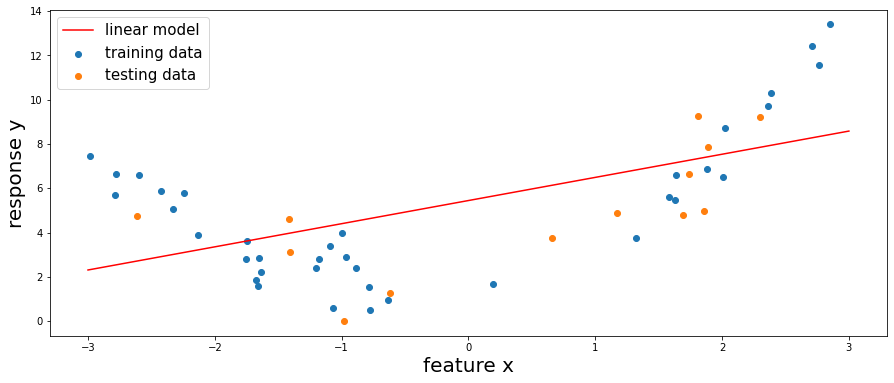

In [28]:
# fit a linear model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#RMSE on train set
y_train_pred = linreg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = linreg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = linreg.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=15)

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

The linear model is underfitting the data

## Polynomial regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=2,include_bias=False)),
    ('regressor', LinearRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

RMSE on training set: 0.69
RMSE on testing set: 1.91


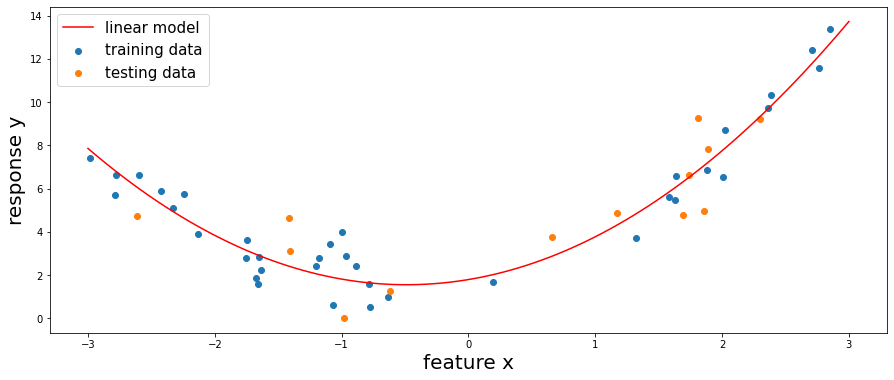

In [30]:
# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=15)

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

## Overfitting

If we perform high-degree polynomial regression, we will likely fit the training data much better than with plain Linear Regression.
But the model will severely overfit the training data.

RMSE on training set: 0.25
RMSE on testing set: 2242386.22


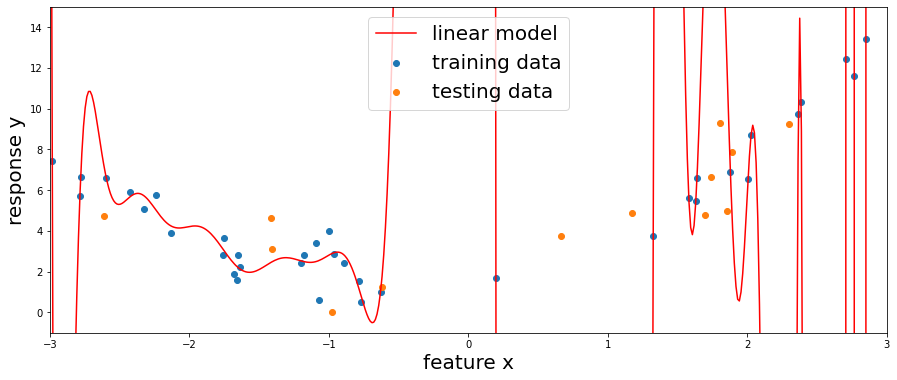

In [31]:
# high-degree polynomial regression
pipe['poly_features'].degree = 50


# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 500
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))



Notice how the 50-degree polynomial model wiggles around to get as close as possible to the training data points

In [32]:
# The higher your regression model degree, the more likely you are to overfit the data
rmse_train = []
rmse_test = []
max_deg = 50
for degree in range(1,max_deg):
    
    # set polynomial features degree to degree
    pipe['poly_features'].degree = degree
    # fit the pipeline
    pipe.fit(X_train,y_train)
    #RMSE on train set
    y_train_pred = pipe.predict(X_train)
    rmse_train.append(mean_squared_error(y_train,y_train_pred))
    #RMSE on test set
    y_test_pred = pipe.predict(X_test)
    rmse_test.append(mean_squared_error(y_test,y_test_pred))

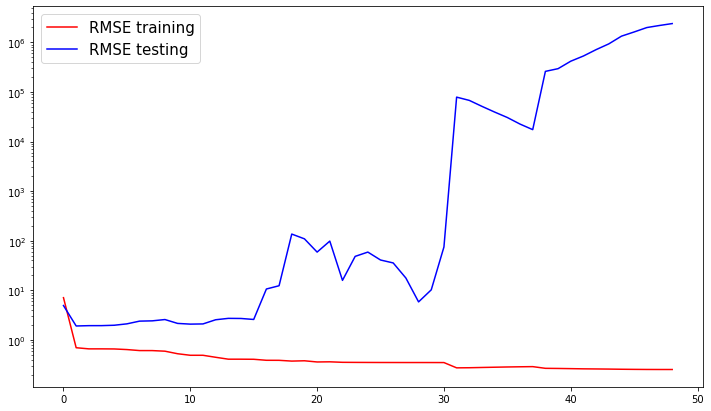

In [33]:
plt.figure(figsize=(12,7))
plt.semilogy(rmse_train,'r', label='RMSE training')
plt.semilogy(rmse_test,'b', label='RMSE testing')
plt.legend(fontsize=15)

Having large model coefficients can be seen as evidence of overfitting:

In [35]:
pipe['regressor'].coef_

array([[-1.32441707e+04,  1.21701370e+06, -4.73218044e+07,
         1.04386006e+09, -1.47088534e+10,  1.40675325e+11,
        -9.42743375e+11,  4.48187245e+12, -1.50186503e+13,
         3.43082941e+13, -4.86155052e+13,  2.97059125e+13,
         1.87706917e+13, -3.22903011e+13, -1.29758795e+13,
         2.46522223e+13,  2.14837850e+13, -1.12843790e+13,
        -2.53914706e+13, -1.09934223e+13,  1.32743415e+13,
         2.25435106e+13,  1.16920311e+13, -5.73505680e+12,
        -1.98576367e+13, -1.76380793e+13, -4.50087698e+12,
         1.12218538e+13,  1.74486406e+13,  1.58476043e+13,
         3.49846774e+12, -9.05607248e+12, -1.63963782e+13,
        -1.51732888e+13, -7.27003174e+12,  6.20254511e+12,
         1.49239164e+13,  1.56364238e+13,  7.98171831e+12,
        -1.04566370e+12, -1.34046554e+13, -1.60838114e+13,
        -1.02992252e+13,  4.11777218e+12,  1.61991040e+13,
         1.63587137e+13, -2.96609656e+12, -2.54199058e+13,
         1.18827451e+13]])

<BarContainer object of 49 artists>

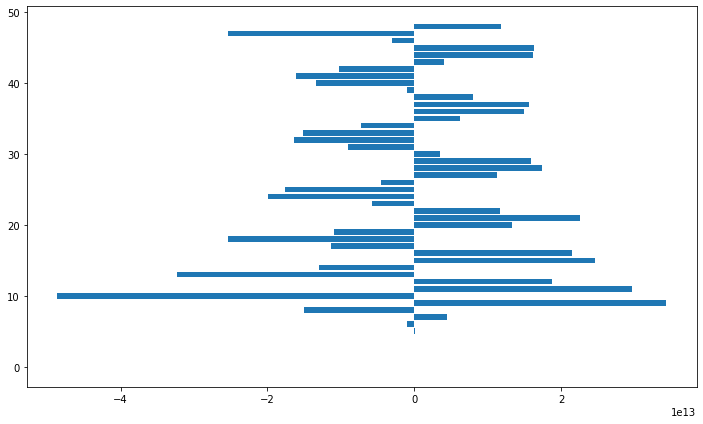

In [37]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['regressor'].coef_.flatten())

## Regularization

One way to reduce overfittin is to **regularize the model**, this is, to contrain it: the fewer degrees of freedom it has, the harder it  will be for it to over fit the data.
Regularization is typically achieved by **constraining the model coefficients**

### Ridge Regression

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n \theta_i^2 
$$

This forces the model to not only fit the data but also keep the model coefficients as small as possible.
The **hyperparameter $\alpha$** controls how much you want to regularize the model.
- If $\alpha=0$, then Ridge Regression is just Linear Regression.
- If $\alpha$ is very large, then all coefficients end up very close to zero and the result is a flat line goint through the data's mean.

In [39]:
from sklearn.linear_model import Ridge

The code below trains a Ridge Regression model. 
You can play with different values of the regularization hyperparameter $\alpha$.

RMSE on training set: 1.01
RMSE on testing set: 2.16


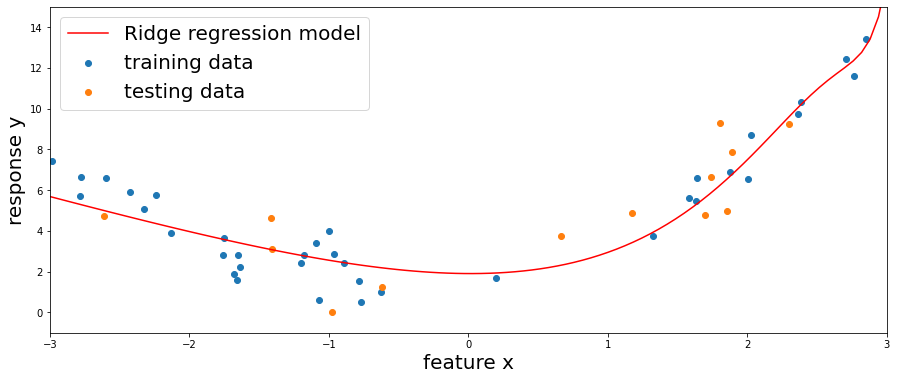

In [40]:
# Ridge regularization
degree=50
alpha=0.1


pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('regressor', Ridge(alpha=alpha))
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='Ridge regression model')
# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

<BarContainer object of 50 artists>

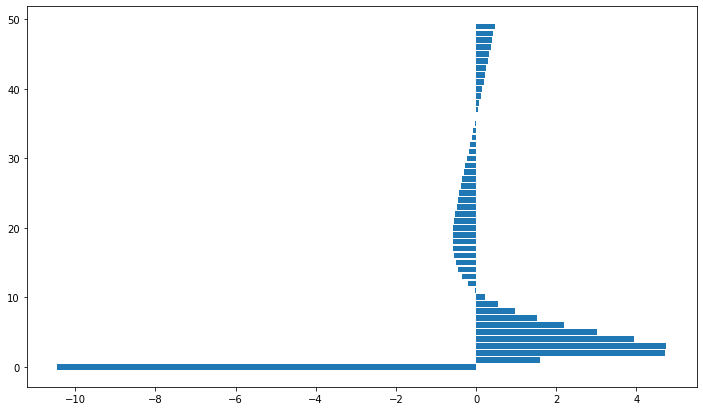

In [42]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['regressor'].coef_.flatten())

### Lasso (Least Absolute Shrinkage and Selection Operator) Regularization 

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n |\theta_i| 
$$

An important characteristic of Lasso Regression is that it tends to eliminate the coefficients of the least important features (this is, set them to zero).

In [44]:
from sklearn.linear_model import Lasso

RMSE on training set: 1.17
RMSE on testing set: 2.07


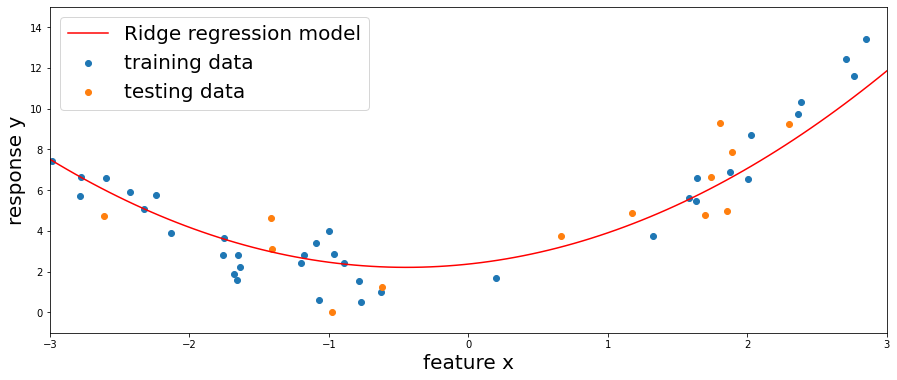

In [45]:
# Lasso regularization
degree=50
alpha = 0.5

pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', Lasso(alpha=alpha)) 
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='Ridge regression model')
# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

<BarContainer object of 50 artists>

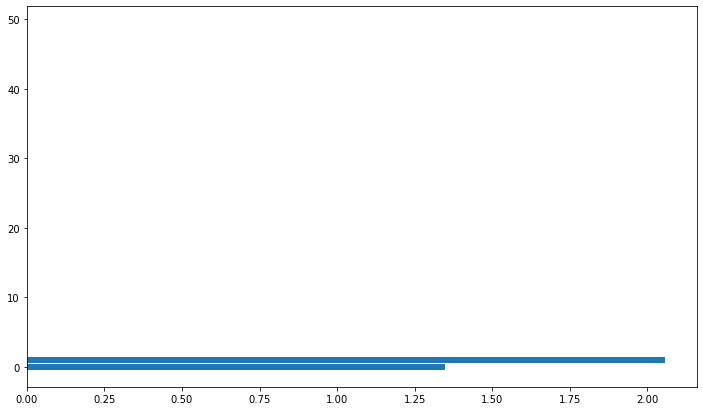

In [46]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

In [47]:
pipe['reg'].coef_

array([1.34842536, 2.05640699, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [50]:
pipe['reg'].intercept_

array([4.92505072])

Lasso has discovered that our data is based on a quadratic equation!